# For the creation of augmentation algorithms to be used in the EventProp HD model

### Load dataset and visualise for development

In [37]:
import numpy as np
import os
import matplotlib.pyplot as plt
import copy
from tqdm import trange

import random

import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops


In [38]:
file_path = os.path.expanduser("~/data/rawHD/experimental_2/")
x_train = np.load(file_path + "training_x_data.npy")
y_train = np.load(file_path + "training_y_data.npy")

training_images = x_train + abs(np.floor(x_train.min()))

In [39]:
def shift_y_axis(image_array, shift_value = np.random.randint(-5, 5)):
    
    new_image_array = copy.deepcopy(image_array)
    
    if shift_value > 0:
        new_image_array[0: -shift_value, :] = image_array[shift_value:,:]
        new_image_array[-shift_value:,:] = 0
    
    if shift_value < 0:
        new_image_array[-shift_value:, :] = image_array[0: shift_value, :]
        new_image_array[0:-shift_value, :] = 0
        
    return new_image_array


def shift_x_axis(image_array, shift_value = np.random.randint(-5, 5)):
    
    new_image_array = copy.deepcopy(image_array)
    
    if shift_value > 0:
        new_image_array[0: ,shift_value:] = image_array[:,: -shift_value]
        new_image_array[:, :shift_value] = 0
    
    if shift_value < 0:
        new_image_array[:,:shift_value] = image_array[:,-shift_value:]
        new_image_array[:,shift_value:] = 0
        
    return new_image_array


def neighbour_swap(image_array, pSwap = 0.2, kSwap = 3):
    new_image_array = copy.deepcopy(image_array)
    
    for x in range(image_array.shape[0]):
        for y in range(image_array.shape[1]):
            if np.random.uniform() > pSwap:
                k = np.random.randint(-kSwap, kSwap, 2)
                kx, ky = x + k[0], y + k[1]
                
                if kx > -1 and kx < image_array.shape[0] and ky > -1 and ky < image_array.shape[1]:
                    new_image_array[kx, ky] = image_array[x, y]
    
    return new_image_array

### Shifting in the y axis

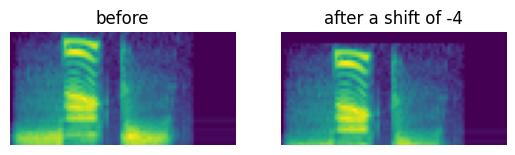

In [40]:
x_train = copy.deepcopy(training_images[0])
shift = np.random.randint(-5, 5)

new_x_train = shift_y_axis(x_train, shift)
    
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("before")
ax1.imshow(x_train)
ax1.axis("off")

ax2.set_title(f"after a shift of {shift}")
ax2.imshow(new_x_train)
ax2.axis("off")

plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

### Shifting in the x axis

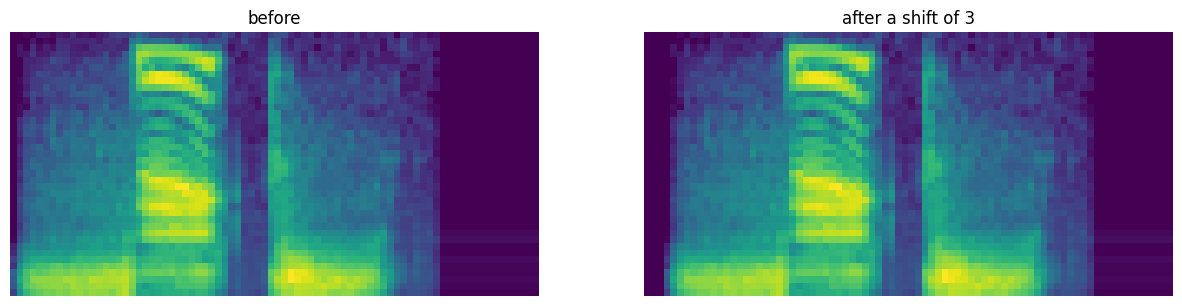

In [41]:
x_train = copy.deepcopy(training_images[0])
shift = np.random.randint(-5, 5)

new_x_train = shift_x_axis(x_train, shift)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("before")
ax1.imshow(x_train)
ax1.axis("off")

ax2.set_title(f"after a shift of {shift}")
ax2.imshow(new_x_train)
ax2.axis("off")

plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

### adding noise to the data (neighbour swapping)



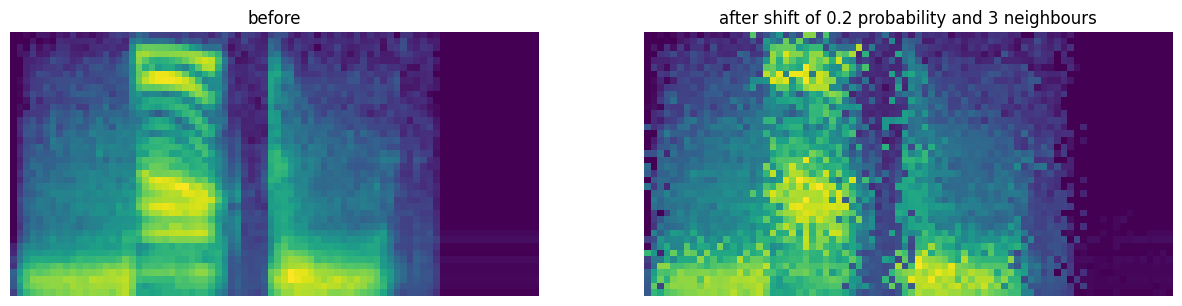

In [42]:
x_train = training_images[0]
pSwap = 0.2 #swap probability
kSwap = 3 #distance of neighbour swap

new_x_train = neighbour_swap(x_train)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("before")
ax1.imshow(x_train)
ax1.axis("off")

ax2.set_title(f"after shift of {pSwap} probability and {kSwap} neighbours")
ax2.imshow(new_x_train)
ax2.axis("off")

plt.rcParams["figure.figsize"] = (15, 10)
plt.show()

### blending classes for new image

In [43]:
# sort x training images into y categories for blending
categories = [[] for i in range(np.max(y_train) + 1)]

for i in trange(y_train.shape[0]):
    categories[y_train[i]].append(i)

100%|██████████| 8156/8156 [00:00<00:00, 2956931.75it/s]


(21.3337921541638, 26.41018582243634)


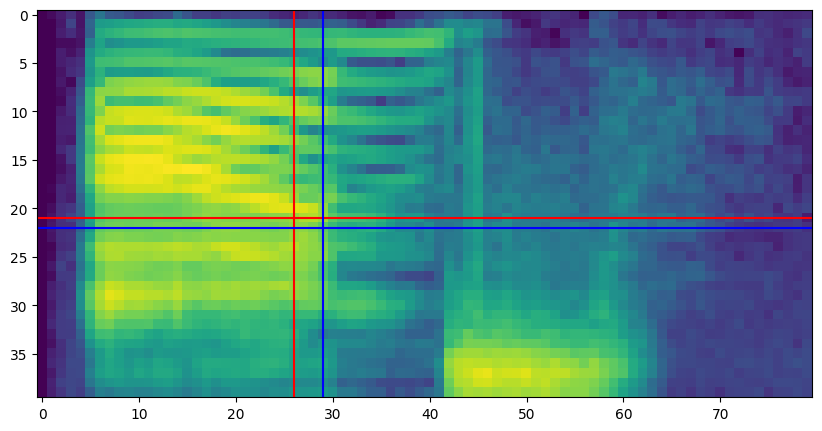

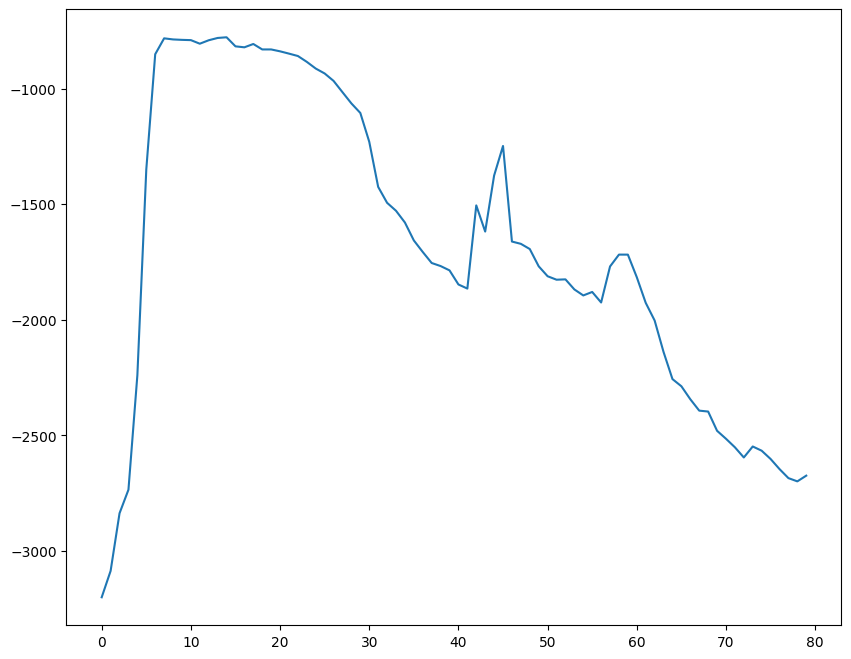

In [44]:
x_train = np.load(file_path + "training_x_data.npy")
class_digit = 11
x_train = x_train[categories[class_digit][np.random.randint(0, len(categories[class_digit]))]]


def get_image_center_of_mass(image_array):
    threshold_value = filters.threshold_otsu(image_array)
    labeled_foreground = (image_array > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image_array)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    return center_of_mass, weighted_center_of_mass

center_of_mass, weighted_center_of_mass = get_image_center_of_mass(x_train)
print(center_of_mass)
plt.rcParams["figure.figsize"] = (10, 8)
plt.imshow(x_train)
plt.axhline(np.round(center_of_mass[0]), c = "r")
plt.axvline(np.round(center_of_mass[1]), c = "r")
plt.axhline(np.round(weighted_center_of_mass[0]), c = "b")
plt.axvline(np.round(weighted_center_of_mass[1]), c = "b")
plt.show()

# Getting the central mass of the image
plt.rcParams["figure.figsize"] = (10, 8)
flattened = np.sum(x_train, axis = 0)
plt.plot(flattened)
plt.show()


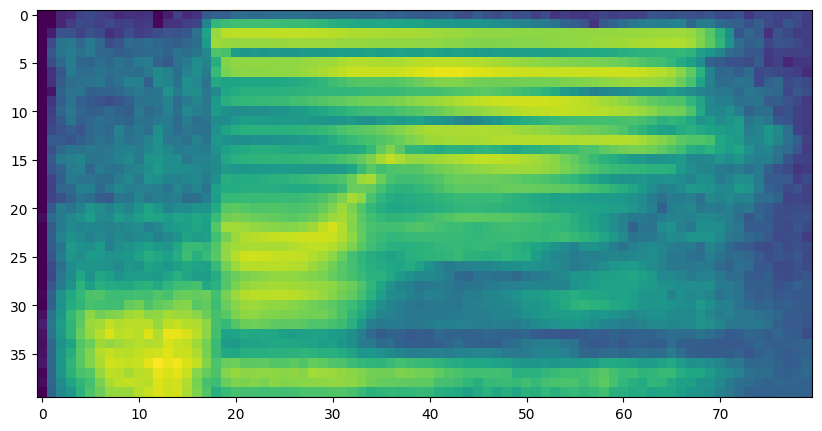

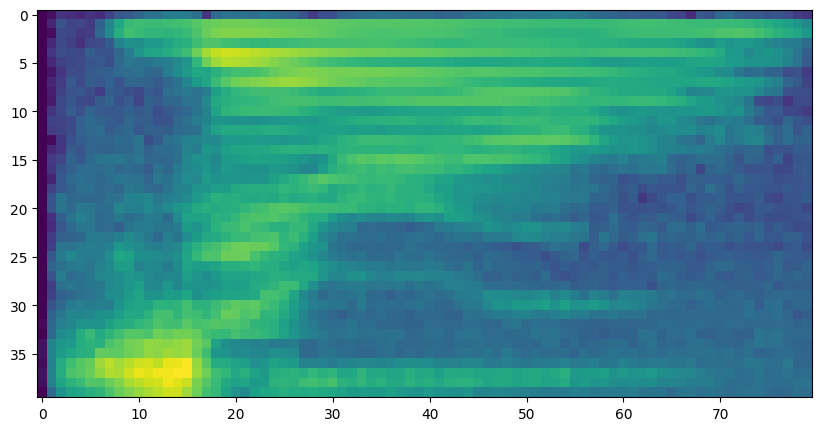

In [45]:
image1 = training_images[categories[0][0]]
image2 = training_images[categories[0][1]]

plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()

center of mass for image 1: [20. 26.]
center of mass for image 2: [20. 30.]
average between both images is [20. 28.]
difference between image 1 is [0. 2.]
difference between image 2 is [ 0. -2.]


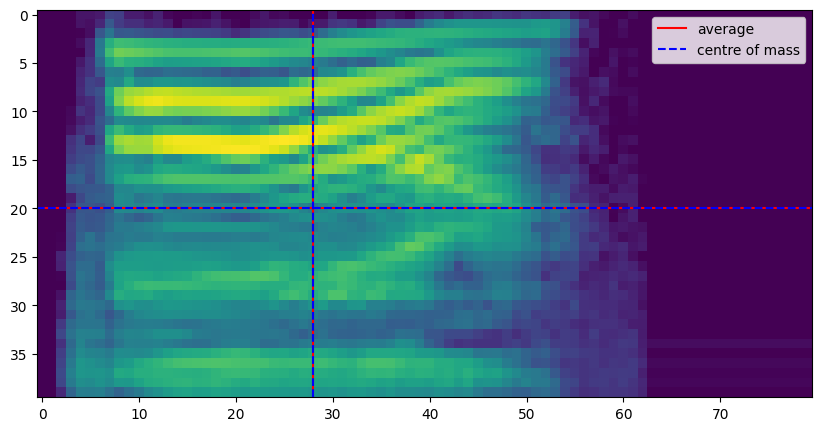

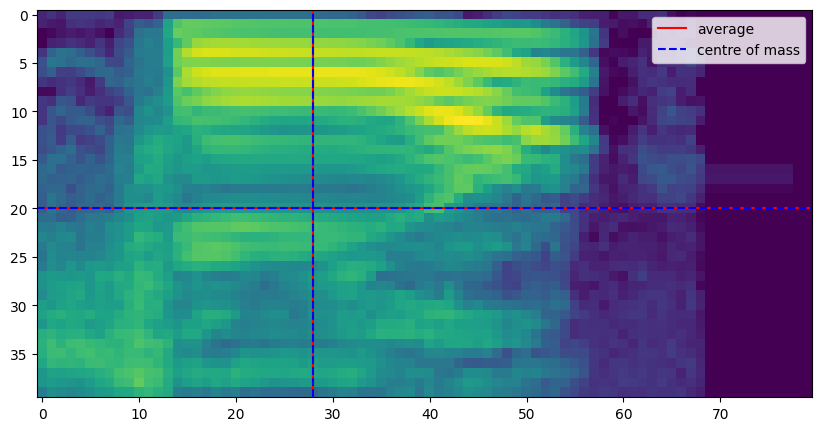

In [46]:
### PROOF ###

random_class = np.random.randint(0, 19)
random_trial1 = np.random.randint(0, 300)
random_trial2 = np.random.randint(0, 300)

com_or_wcom = 0

image1 = training_images[categories[random_class][random_trial1]]
image2 = training_images[categories[random_class][random_trial2]]

com1 = np.round(get_image_center_of_mass(image1)[com_or_wcom])
com2 = np.round(get_image_center_of_mass(image2)[com_or_wcom])

print(f"center of mass for image 1: {com1}")
print(f"center of mass for image 2: {com2}")

difference = np.round(np.mean([com1, com2], axis = 0))

print(f"average between both images is {difference}")

print(f"difference between image 1 is {difference - com1}")
print(f"difference between image 2 is {difference - com2}")

new_image1 = shift_y_axis(shift_x_axis(image1, int((difference - com1)[1])), int((difference - com1)[0]))

new_image2 = shift_y_axis(shift_x_axis(image2, int((difference - com2)[1])), int((difference - com2)[0]))

plt.imshow(new_image1)
plt.axhline(difference[0], c = "r")
plt.axvline(difference[1], c = "r", label = "average")
plt.axhline((com1[0] + int((difference - com1)[0])), linestyle = "--", c = "b")
plt.axvline((com1[1] + int((difference - com1)[1])), linestyle = "--", c = "b", label = "centre of mass")
plt.legend()
plt.show()

plt.imshow(new_image2)
plt.axhline(difference[0], c = "r")
plt.axvline(difference[1], c = "r", label = "average")
plt.axhline((com2[0] + int((difference - com2)[0])), linestyle = "--", c = "b")
plt.axvline((com2[1] + int((difference - com2)[1])), linestyle = "--", c = "b", label = "centre of mass")
plt.legend()
plt.show()

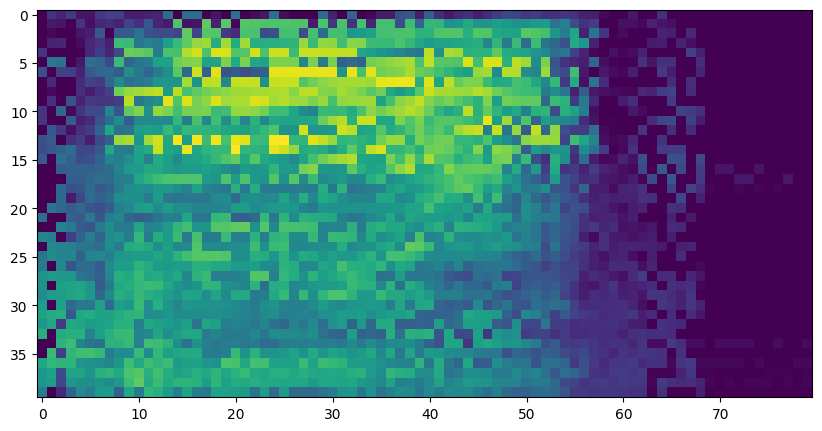

In [47]:
# merging the two images into one

combined_image = copy.deepcopy(new_image1)

for y in range(new_image1.shape[0]):
    for x in range(new_image1.shape[1]):
        p = np.random.uniform()
        if p > 0.5:
            combined_image[y, x] = new_image2[y, x]
            
            
plt.imshow(combined_image)
plt.show()

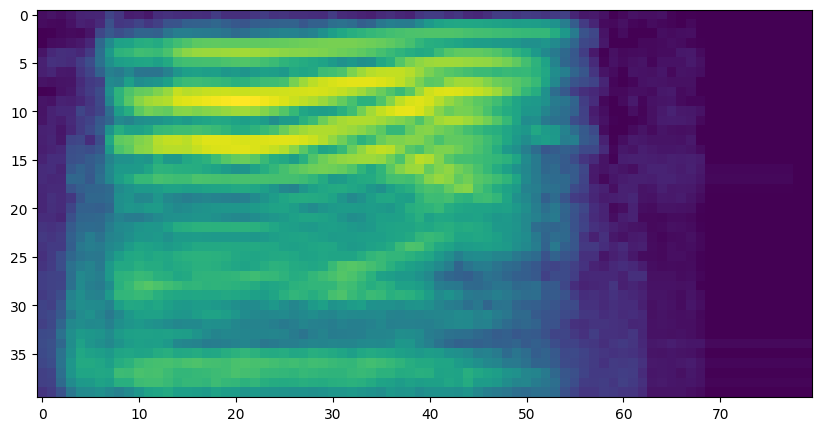

In [48]:
# merging the two images into one

combined_image = copy.deepcopy(new_image1)

for y in range(new_image1.shape[0]):
    for x in range(new_image1.shape[1]):
        combined_image[y, x] = (combined_image[y, x] + new_image2[y, x] / 2)
            
            
plt.imshow(combined_image)
plt.show()

In [49]:
def combine_two_images(image_array_1, image_array_2, com_or_wcom = 0):
    """
    To combine two images by averaging them together

    :param image_array_1: first image
    :param image_array_2: second image
    :param com_or_wcom: centre of mass or weighted centre of mass
    :return: image array of combined images
    """

    com1 = np.round(get_image_center_of_mass(image_array_1)[com_or_wcom])
    com2 = np.round(get_image_center_of_mass(image_array_2)[com_or_wcom])

    difference = np.round(np.mean([com1, com2], axis = 0))

    new_image1 = shift_y_axis(shift_x_axis(image_array_1, int((difference - com1)[1])), int((difference - com1)[0]))
    new_image2 = shift_y_axis(shift_x_axis(image_array_2, int((difference - com2)[1])), int((difference - com2)[0]))
    
    combined_image = copy.deepcopy(new_image1)

    for y in range(new_image1.shape[0]):
        for x in range(new_image1.shape[1]):
            combined_image[y, x] = (combined_image[y, x] + new_image2[y, x] / 2)
    
    return combined_image

In [50]:
x_train = np.load(file_path + "training_x_data.npy")
y_train = np.load(file_path + "training_y_data.npy")
training_images = x_train + abs(np.floor(x_train.min()))

# sort x training images into y categories for blending
categories = [[] for i in range(np.max(y_train) + 1)]

for i in trange(y_train.shape[0]):
    categories[y_train[i]].append(i)
    
combined_image_array = []


100%|██████████| 8156/8156 [00:00<00:00, 3079371.99it/s]


100%|██████████| 20/20 [00:31<00:00,  1.59s/it]


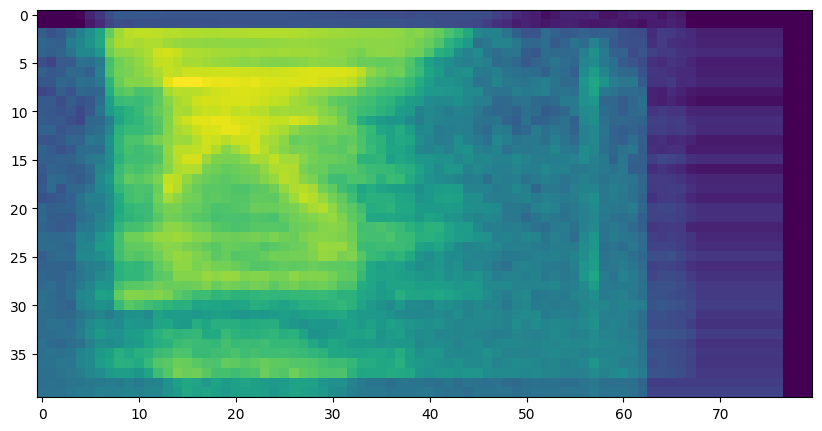

In [51]:
for spoken_word in trange(len(categories)):

    random.shuffle(categories[spoken_word])

    while len(categories[spoken_word]) > 1:
        image1 = training_images[categories[spoken_word][0]]
        image2 = training_images[categories[spoken_word][1]]
        
        combined_image_array.append(combine_two_images(image1, image2))
        categories[spoken_word].pop()
        categories[spoken_word].pop()

        #print(f"images left: {len(categories[spoken_word])} | new generated images: {len(combined_image_array)}")
        
plt.imshow(combined_image_array[-1])
plt.show()

In [52]:
import augmentation_tools
import numpy as np
import os
from tqdm import trange
import random
import matplotlib.pyplot as plt

In [53]:
file_path = os.path.expanduser("~/data/rawHD/experimental_2/")
x_train = np.load(file_path + "training_x_data.npy")
y_train = np.load(file_path + "training_y_data.npy")
training_images = x_train + abs(np.floor(x_train.min()))

# sort x training images into y categories for blending
categories = [[] for i in range(np.max(y_train) + 1)]

for i in range(y_train.shape[0]):
    categories[y_train[i]].append(i)
    
combined_image_array = []


100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


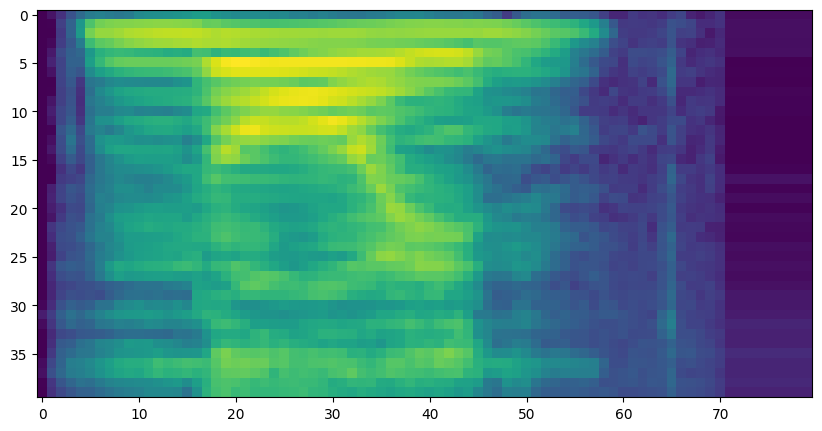

In [54]:
for spoken_word in trange(len(categories)):

    random.shuffle(categories[spoken_word])

    while len(categories[spoken_word]) > 1:
        image1 = training_images[categories[spoken_word][0]]
        image2 = training_images[categories[spoken_word][1]]
        
        combined_image_array.append(augmentation_tools.combine_two_images(image1, image2))
        categories[spoken_word].pop()
        categories[spoken_word].pop()

        #print(f"images left: {len(categories[spoken_word])} | new generated images: {len(combined_image_array)}")
        
plt.imshow(combined_image_array[-1])
plt.show()

100%|██████████| 20/20 [00:31<00:00,  1.57s/it]


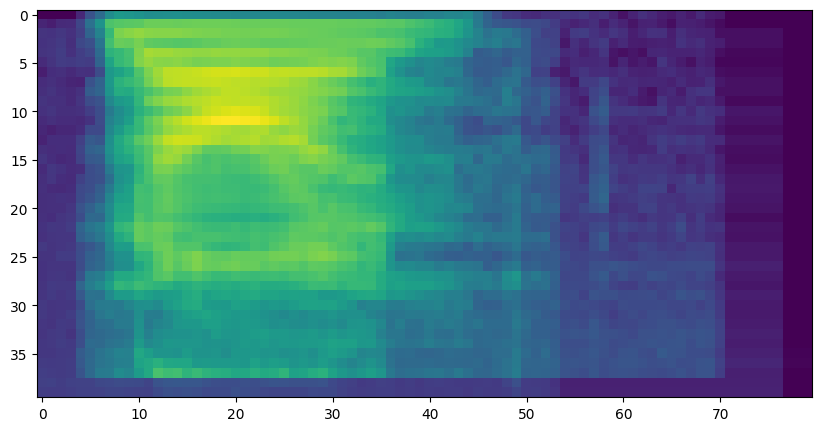

In [55]:
import augmentation_tools
import numpy as np
import os
from tqdm import trange
import random
import matplotlib.pyplot as plt

file_path = os.path.expanduser("~/data/rawHD/experimental_2/")
x_train = np.load(file_path + "training_x_data.npy")
y_train = np.load(file_path + "training_y_data.npy")
training_images = x_train + abs(np.floor(x_train.min()))

# sort x training images into y categories for blending
categories = [[] for i in range(np.max(y_train) + 1)]

for i in range(y_train.shape[0]):
    categories[y_train[i]].append(i)
    
combined_image_array = []
combined_class_array = []

for spoken_word in trange(len(categories)):

    random.shuffle(categories[spoken_word])

    while len(categories[spoken_word]) > 1:
        image1 = training_images[categories[spoken_word][0]]
        image2 = training_images[categories[spoken_word][1]]
        
        combined_image_array.append(augmentation_tools.combine_two_images(image1, image2))
        categories[spoken_word].pop()
        categories[spoken_word].pop()
        
        combined_class_array.append(spoken_word)

        #print(f"images left: {len(categories[spoken_word])} | new generated images: {len(combined_image_array)}")
        
plt.imshow(combined_image_array[-1])
plt.show()


In [56]:
np.array(combined_image_array).shape

(4073, 40, 80)

In [110]:
import augmentation_tools
import numpy as np
import os
from tqdm import trange
import random
import matplotlib.pyplot as plt
import pandas as pd

file_path = os.path.expanduser("~/data/rawHD/experimental_2/")
x_train = np.load(file_path + "training_x_data.npy")
y_train = np.load(file_path + "training_y_data.npy")
training_images = x_train + abs(np.floor(x_train.min()))

training_details = pd.read_csv(file_path + "training_details.csv")

In [ ]:
def duplicate_and_mod_dataset(training_details, training_images):
    training_images_repeat = np.repeat(training_images, 2, axis = 0)
    training_details_repeat = pd.DataFrame(np.repeat(training_details.values, 2, axis = 0))

    for trial in trange(0, len(training_details_repeat), 2):
        training_images_repeat[trial] = neighbour_swap(training_images_repeat[trial])
        
    return training_details_repeat, training_images_repeat, np.array(training_details_repeat.loc[:, 5], dtype = "int8")
    

In [131]:

training_details_repeat = pd.DataFrame(np.repeat(training_details.values, 2, axis = 0))

training_details_repeat.columns = training_details.columns

print(training_details_repeat.head())

  Unnamed: 0 Language Speaker Trial Label classification label
0          0  english       2    13     6                    6
1          0  english       2    13     6                    6
2          1   german       1    34     2                   12
3          1   german       1    34     2                   12
4          2   german       1    25     8                   18


In [60]:
def combine_two_images_and_concatinate(training_images, training_labels):
    # sort x training images into y categories for blending
    categories = [[] for i in range(np.max(training_labels) + 1)]

    for i in range(training_labels.shape[0]):
        categories[training_labels[i]].append(i)
        
    combined_image_array = []
    combined_class_array = []

    for spoken_word in trange(len(categories)):

        random.shuffle(categories[spoken_word])

        while len(categories[spoken_word]) > 1:
            image1 = training_images[categories[spoken_word][0]]
            image2 = training_images[categories[spoken_word][1]]
            
            combined_image_array.append(augmentation_tools.combine_two_images(image1, image2))
            categories[spoken_word].pop()
            categories[spoken_word].pop()
            
            combined_class_array.append(spoken_word)
    
    combined_training_images = np.concatenate([training_images, 
                                               np.array(combined_image_array)])
    
    combined_training_labels = np.concatenate([training_labels,
                                               np.array(combined_class_array)])
    
    return combined_training_images, combined_training_labels

In [61]:
cti = augmentation_tools.combine_two_images_and_concatinate(training_images, y_train)[0]


100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


In [62]:
cti.shape

(12229, 40, 80)